In [15]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.applications.efficientnet import preprocess_input as efficientnet_preprocess

In [4]:
not_trainable = pd.read_csv('outputs/results_not_trainable.csv')
trainable = pd.read_csv('outputs/results_trainable.csv')

In [5]:
not_trainable

,Model,Train Accuracy,Train Loss,Validation Accuracy,Validation Loss,Test Loss,Test Accuracy,Training Duration,Total Epoch
0,EfficientNetB0,0.923300,0.224197,0.887931,0.309241,0.980673,0.716471,1526.488535,18
1,EfficientNetB1,0.917511,0.226357,0.882184,0.306373,0.663236,0.759216,1526.488535,18
2,EfficientNetB2,0.897974,0.260599,0.890805,0.272235,0.665238,0.745882,1526.488535,18
3,EfficientNetB3,0.926917,0.189006,0.933908,0.212490,0.609218,0.776078,1526.488535,18
4,EfficientNetB4,0.938495,0.176494,0.931035,0.182656,0.797472,0.732549,1526.488535,18
5,EfficientNetB5,0.958032,0.113112,0.936782,0.196974,0.622120,0.797647,1526.488535,18
6,EfficientNetB6,0.965268,0.094941,0.942529,0.141136,1.036159,0.754118,1526.488535,18
7,EfficientNetB7,0.952967,0.134530,0.919540,0.227406,1.437082,0.709020,1526.488535,18


EfficientNetB5 memberikan nilai akurasi pada data test tertinggi

In [6]:
trainable

,Model,Train Accuracy,Train Loss,Validation Accuracy,Validation Loss,Test Loss,Test Accuracy,Training Duration,Total Epoch
0,EfficientNetB0,0.904486,0.258503,0.902299,0.259506,0.953657,1056.849794,2206.455527,26
1,EfficientNetB1,0.932706,0.191718,0.908046,0.267096,0.951960,0.710588,2206.455527,26
2,EfficientNetB2,0.942113,0.159752,0.899425,0.250371,0.763945,0.727059,2206.455527,26
3,EfficientNetB3,0.964544,0.110190,0.945402,0.138997,0.413621,0.840392,2206.455527,26
4,EfficientNetB4,0.982634,0.061023,0.962644,0.100997,0.795683,0.806275,2206.455527,26
5,EfficientNetB5,0.986252,0.042780,0.968391,0.127252,0.864044,0.778431,2206.455527,26
6,EfficientNetB6,0.983357,0.058528,0.954023,0.127000,0.871808,0.746275,2206.455527,26
7,EfficientNetB7,0.993488,0.039941,0.979885,0.077881,0.764046,0.818431,2206.455527,26


EfficientNetB3 memberikan nilai akurasi pada data test tertinggi

# Melakukan test terhadap dataset test yang sudah di downsample

In [13]:
model_path_not_trainable = 'best_model_not_trainable/best_model_EfficientNetB5.h5'
model_path_trainable = 'best_model_trainable/best_model_EfficientNetB3.h5'
model_not_trainable = load_model(model_path_not_trainable)
model_trainable = load_model(model_path_trainable)

test_dir = 'data/split_train_test_dataset_campuran_balanced_test'

Found 825 images belonging to 3 classes.
26/26 [==============================] - 271s 10s/step
Classification Report:
               precision    recall  f1-score   support

     healthy       0.60      0.97      0.74       275
        rust       0.86      0.30      0.44       275
        scab       0.46      0.48      0.47       275

    accuracy                           0.58       825
   macro avg       0.64      0.58      0.55       825
weighted avg       0.64      0.58      0.55       825



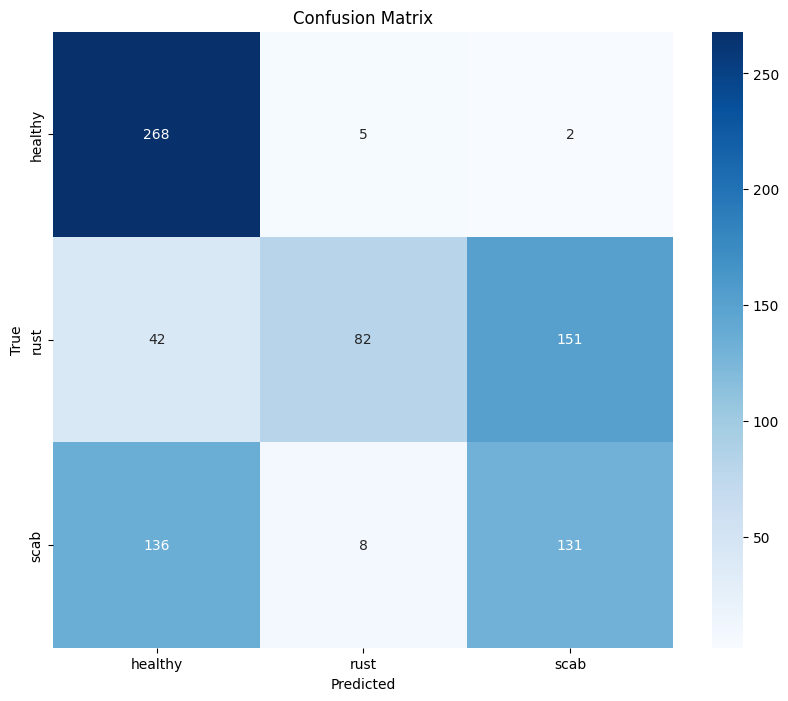

In [16]:
# Menggunakan ImageDataGenerator untuk melakukan preprocessing pada data testing
test_datagen = ImageDataGenerator(preprocessing_function=efficientnet_preprocess)

# Generator untuk data testing
test_generator = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(456, 456),  # Sesuaikan dengan input size model
    batch_size=32,  # Gunakan batch_size = 1 agar bisa mengambil gambar satu per satu
    class_mode='categorical',
    shuffle=False  # Jangan di-shuffle untuk menjaga urutan gambar
)

y_pred = model_not_trainable.predict(test_generator, steps=len(test_generator), verbose=1)

y_pred_classes = np.argmax(y_pred, axis=1)

y_true = test_generator.classes

class_names = list(test_generator.class_indices.keys())

cm = confusion_matrix(y_true, y_pred_classes)

print("Classification Report:\n", classification_report(y_true, y_pred_classes, target_names=class_names))

# Langkah 5: Menampilkan confusion matrix sebagai heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Found 825 images belonging to 3 classes.
26/26 [==============================] - 59s 2s/step
Classification Report:
               precision    recall  f1-score   support

     healthy       0.82      0.90      0.85       275
        rust       0.96      0.51      0.67       275
        scab       0.59      0.81      0.68       275

    accuracy                           0.74       825
   macro avg       0.79      0.74      0.73       825
weighted avg       0.79      0.74      0.73       825



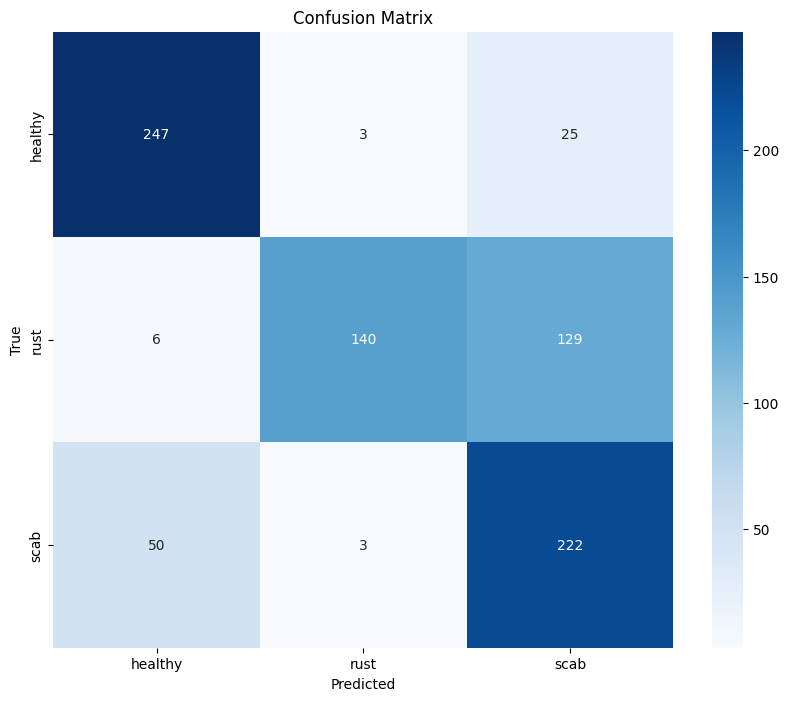

In [17]:
# Menggunakan ImageDataGenerator untuk melakukan preprocessing pada data testing
test_datagen = ImageDataGenerator(preprocessing_function=efficientnet_preprocess)

# Generator untuk data testing
test_generator = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(300, 300),  # Sesuaikan dengan input size model
    batch_size=32,  # Gunakan batch_size = 1 agar bisa mengambil gambar satu per satu
    class_mode='categorical',
    shuffle=False  # Jangan di-shuffle untuk menjaga urutan gambar
)

y_pred = model_trainable.predict(test_generator, steps=len(test_generator), verbose=1)

y_pred_classes = np.argmax(y_pred, axis=1)

y_true = test_generator.classes

class_names = list(test_generator.class_indices.keys())

cm = confusion_matrix(y_true, y_pred_classes)

print("Classification Report:\n", classification_report(y_true, y_pred_classes, target_names=class_names))

# Langkah 5: Menampilkan confusion matrix sebagai heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Found 825 images belonging to 3 classes.
26/26 [==============================] - 45s 2s/step
Classification Report:
               precision    recall  f1-score   support

     healthy       0.76      0.89      0.82       275
        rust       0.85      0.67      0.75       275
        scab       0.61      0.64      0.63       275

    accuracy                           0.73       825
   macro avg       0.74      0.73      0.73       825
weighted avg       0.74      0.73      0.73       825



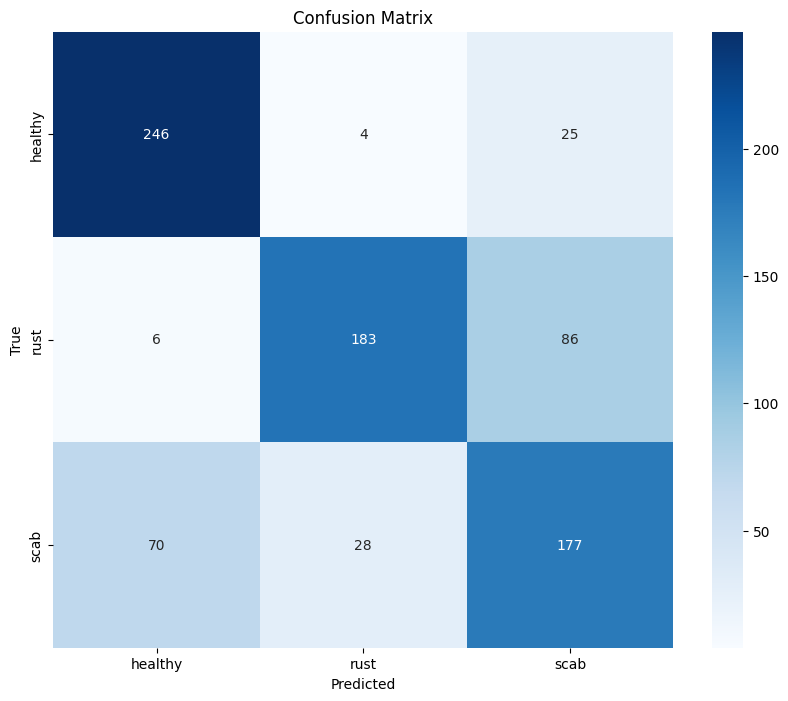

In [20]:
test_dir = 'data/split_train_test_dataset_campuran_balanced_test'

# Menggunakan ImageDataGenerator untuk melakukan preprocessing pada data testing
test_datagen = ImageDataGenerator(preprocessing_function=efficientnet_preprocess)

# Generator untuk data testing
test_generator = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(256, 256),  # Sesuaikan dengan input size model
    batch_size=32,  # Gunakan batch_size = 1 agar bisa mengambil gambar satu per satu
    class_mode='categorical',
    shuffle=False  # Jangan di-shuffle untuk menjaga urutan gambar
)

y_pred = model_trainable.predict(test_generator, steps=len(test_generator), verbose=1)

y_pred_classes = np.argmax(y_pred, axis=1)

y_true = test_generator.classes

class_names = list(test_generator.class_indices.keys())

cm = confusion_matrix(y_true, y_pred_classes)

print("Classification Report:\n", classification_report(y_true, y_pred_classes, target_names=class_names))

# Langkah 5: Menampilkan confusion matrix sebagai heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Found 2550 images belonging to 3 classes.
80/80 [==============================] - 130s 2s/step
Classification Report:
               precision    recall  f1-score   support

     healthy       0.91      0.92      0.91      1645
        rust       0.71      0.67      0.69       275
        scab       0.66      0.67      0.66       630

    accuracy                           0.83      2550
   macro avg       0.76      0.75      0.75      2550
weighted avg       0.83      0.83      0.83      2550



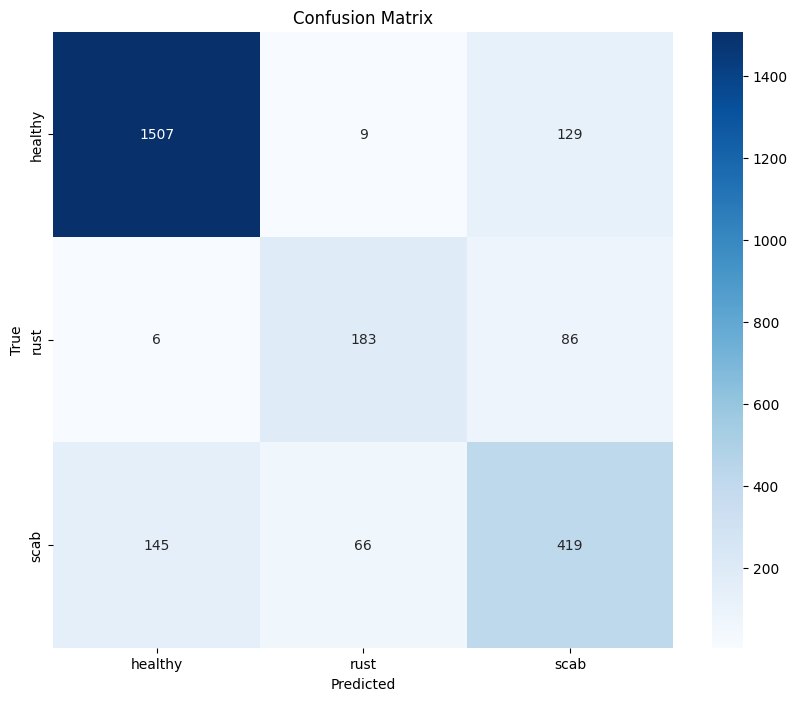

In [21]:
test_dir = 'data/split_train_test_dataset_campuran/test'

# Menggunakan ImageDataGenerator untuk melakukan preprocessing pada data testing
test_datagen = ImageDataGenerator(preprocessing_function=efficientnet_preprocess)

# Generator untuk data testing
test_generator = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(256, 256),  # Sesuaikan dengan input size model
    batch_size=32,  # Gunakan batch_size = 1 agar bisa mengambil gambar satu per satu
    class_mode='categorical',
    shuffle=False  # Jangan di-shuffle untuk menjaga urutan gambar
)

y_pred = model_trainable.predict(test_generator, steps=len(test_generator), verbose=1)

y_pred_classes = np.argmax(y_pred, axis=1)

y_true = test_generator.classes

class_names = list(test_generator.class_indices.keys())

cm = confusion_matrix(y_true, y_pred_classes)

print("Classification Report:\n", classification_report(y_true, y_pred_classes, target_names=class_names))

# Langkah 5: Menampilkan confusion matrix sebagai heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Found 1382 images belonging to 3 classes.
44/44 [==============================] - 87s 2s/step
Classification Report:
               precision    recall  f1-score   support

     healthy       0.88      0.97      0.92       412
        rust       0.97      0.96      0.96       497
        scab       0.97      0.89      0.93       473

    accuracy                           0.94      1382
   macro avg       0.94      0.94      0.94      1382
weighted avg       0.94      0.94      0.94      1382



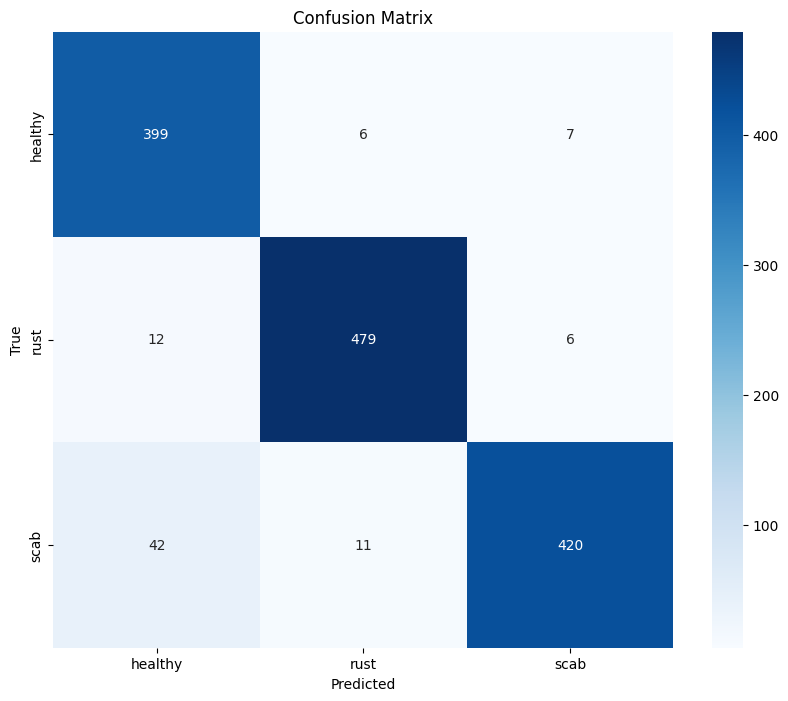

In [24]:
test_dir = 'data/split_train_test_dataset_campuran/train'

# Menggunakan ImageDataGenerator untuk melakukan preprocessing pada data testing
test_datagen = ImageDataGenerator(preprocessing_function=efficientnet_preprocess)

# Generator untuk data testing
test_generator = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(256, 256),  # Sesuaikan dengan input size model
    batch_size=32,  # Gunakan batch_size = 1 agar bisa mengambil gambar satu per satu
    class_mode='categorical',
    shuffle=False  # Jangan di-shuffle untuk menjaga urutan gambar
)

y_pred = model_trainable.predict(test_generator, steps=len(test_generator), verbose=1)

y_pred_classes = np.argmax(y_pred, axis=1)

y_true = test_generator.classes

class_names = list(test_generator.class_indices.keys())

cm = confusion_matrix(y_true, y_pred_classes)

print("Classification Report:\n", classification_report(y_true, y_pred_classes, target_names=class_names))

# Langkah 5: Menampilkan confusion matrix sebagai heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()